## Dhaka_Appartment_price_Prediction
## - Data Cleaning
## - Data Visualization
## - Price prediction using Machine learning
- A Complete Project - Predict Dhaka Apartment Prices

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#import data,there are two differents dataset
df1 = pd.read_csv('/content/drive/MyDrive/Data Analysis with python Project/Dhaka_Apartment_Price_Prediction/Dhaka_Apartment_Dataset.csv')
df2 =pd.read_csv('/content/drive/MyDrive/Data Analysis with python Project/Dhaka_Apartment_Price_Prediction/bproperty_data.csv')


Firstly working on df2 for cleaning

In [3]:
df2.head()

,Unnamed: 0,Location,Price,Type,No. Beds,No. Baths,Area,Latitude,Longitude,Region,Sub-region
0,0.0,"Sector 10, Uttara, Dhaka",7500000,Apartment,3.0,3.0,1300.0,23.86846,90.39280,Uttara,Sector 10
1,1.0,"Section 11, Mirpur, Dhaka",7280000,Apartment,4.0,4.0,1456.0,23.81223,90.35967,Mirpur,Section 11
2,2.0,"Chowdhuripara, Khilgaon, Dhaka",13000000,Apartment,3.0,3.0,1550.0,23.75349,90.42469,Khilgaon,Chowdhuripara
3,3.0,"Road No 4, Banani, Dhaka",37000000,Apartment,3.0,3.0,2669.0,23.78855,90.40081,Banani,Road No 4
4,4.0,"South Banasree Project, Banasree, Dhaka",3600000,Apartment,2.0,2.0,835.0,23.76354,90.43180,Banasree,South Banasree Project


In [4]:
df3=df2[['Price','Type','No. Beds','No. Baths','Area','Region']]
df3

,Price,Type,No. Beds,No. Baths,Area,Region
0,7500000,Apartment,3.0,3.0,1300.0,Uttara
1,7280000,Apartment,4.0,4.0,1456.0,Mirpur
2,13000000,Apartment,3.0,3.0,1550.0,Khilgaon
3,37000000,Apartment,3.0,3.0,2669.0,Banani
4,3600000,Apartment,2.0,2.0,835.0,Banasree
...,...,...,...,...,...,...
4699,4950000,Apartment,3.0,2.0,1100.0,Mirpur
4700,4950000,Apartment,3.0,2.0,1100.0,Mirpur
4701,4950000,Apartment,3.0,2.0,1100.0,Mirpur
4702,4950000,Apartment,3.0,2.0,1100.0,Mirpur


In [5]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4704 entries, 0 to 4703
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Price      4704 non-null   int64  
 1   Type       4704 non-null   object 
 2   No. Beds   4500 non-null   float64
 3   No. Baths  4500 non-null   float64
 4   Area       4704 non-null   float64
 5   Region     4704 non-null   object 
dtypes: float64(3), int64(1), object(2)
memory usage: 220.6+ KB


In [6]:
df3.isnull().sum()

,0
Price,0
Type,0
No. Beds,204
No. Baths,204
Area,0
Region,0


In [7]:
#rename
df4 = df3.rename(columns=
                 {
    'Type':'Type',
    'No. Beds':'Bed',
    'No. Baths':'Bath',
    'Area':'Size',
    'Region':'Location'
})
df4.head(2)

,Price,Type,Bed,Bath,Size,Location
0,7500000,Apartment,3.0,3.0,1300.0,Uttara
1,7280000,Apartment,4.0,4.0,1456.0,Mirpur


In [8]:
df5=df4.iloc[:,[0,1,4,2,3,5]]
df5.head(2)

,Price,Type,Size,Bed,Bath,Location
0,7500000,Apartment,1300.0,3.0,3.0,Uttara
1,7280000,Apartment,1456.0,4.0,4.0,Mirpur


In [9]:
df5.head()

,Price,Type,Size,Bed,Bath,Location
0,7500000,Apartment,1300.0,3.0,3.0,Uttara
1,7280000,Apartment,1456.0,4.0,4.0,Mirpur
2,13000000,Apartment,1550.0,3.0,3.0,Khilgaon
3,37000000,Apartment,2669.0,3.0,3.0,Banani
4,3600000,Apartment,835.0,2.0,2.0,Banasree


In [10]:
df6=df5.dropna() # drop null value and assaign into df6
df6.isnull().sum()

,0
Price,0
Type,0
Size,0
Bed,0
Bath,0
Location,0


In [11]:
df6.dtypes

,0
Price,int64
Type,object
Size,float64
Bed,float64
Bath,float64
Location,object


In [12]:
df6.Bed=df6.Bed.astype(int)
df6.Bath=df6.Bath.astype(int)

<ipython-input-12-3ea00aa7215e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df6.Bed=df6.Bed.astype(int)
<ipython-input-12-3ea00aa7215e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df6.Bath=df6.Bath.astype(int)


In [13]:
df6.dtypes

,0
Price,int64
Type,object
Size,float64
Bed,int64
Bath,int64
Location,object


In [14]:
df6.head(2)

,Price,Type,Size,Bed,Bath,Location
0,7500000,Apartment,1300.0,3,3,Uttara
1,7280000,Apartment,1456.0,4,4,Mirpur


In [15]:
df6.shape

(4500, 6)

Now work on df1

In [16]:
df1.head(3)

,Unnamed: 0,price,size_in_sqf,number_of_bath,number_of_bed,full_location,location_area,purpose_of_listing,type_of_listing,completion_status
0,0,19000000.0,2350.0,4,3,"Block B, Bashundhara R-A, Dhaka",Bashundhara R-A,For Sale,Apartment,Ready
1,1,33000000.0,2294.0,4,3,"Gulshan 1, Gulshan, Dhaka",Gulshan,For Sale,Apartment,Ready
2,2,13500000.0,1745.0,3,3,"Block H, Bashundhara R-A, Dhaka",Bashundhara R-A,For Sale,Apartment,Ready


In [17]:
df7=df1[['price','size_in_sqf','number_of_bath','number_of_bed','location_area','type_of_listing']]
df7.head(1)

,price,size_in_sqf,number_of_bath,number_of_bed,location_area,type_of_listing
0,19000000.0,2350.0,4,3,Bashundhara R-A,Apartment


In [18]:
df8=df7.rename(columns={
    'price':'Price',
    'size_in_sqf':'Size',
    'number_of_bath':'Bath',
    'number_of_bed':'Bed',
    'location_area':'Location',
    'type_of_listing':'Type'
})
df8.head(3)

,Price,Size,Bath,Bed,Location,Type
0,19000000.0,2350.0,4,3,Bashundhara R-A,Apartment
1,33000000.0,2294.0,4,3,Gulshan,Apartment
2,13500000.0,1745.0,3,3,Bashundhara R-A,Apartment


In [19]:
df9=df8.iloc[:,[0,5,1,3,2,4]]

In [20]:
df9.head(2)

,Price,Type,Size,Bed,Bath,Location
0,19000000.0,Apartment,2350.0,3,4,Bashundhara R-A
1,33000000.0,Apartment,2294.0,3,4,Gulshan


In [21]:
df6.head(2)

,Price,Type,Size,Bed,Bath,Location
0,7500000,Apartment,1300.0,3,3,Uttara
1,7280000,Apartment,1456.0,4,4,Mirpur


In [22]:
df9.dtypes

,0
Price,float64
Type,object
Size,float64
Bed,int64
Bath,int64
Location,object


In [23]:
df6.dtypes

,0
Price,int64
Type,object
Size,float64
Bed,int64
Bath,int64
Location,object


In [24]:
df9.Price=df9.Price.astype(int)

In [25]:
df9.dtypes

,0
Price,int64
Type,object
Size,float64
Bed,int64
Bath,int64
Location,object


In [26]:
df10 = pd.concat([df6,df9],axis=0)

In [27]:
df10

,Price,Type,Size,Bed,Bath,Location
0,7500000,Apartment,1300.0,3,3,Uttara
1,7280000,Apartment,1456.0,4,4,Mirpur
2,13000000,Apartment,1550.0,3,3,Khilgaon
3,37000000,Apartment,2669.0,3,3,Banani
4,3600000,Apartment,835.0,2,2,Banasree
...,...,...,...,...,...,...
10575,6000000,Apartment,1210.0,3,3,Maghbazar
10576,7500000,Apartment,1215.0,3,3,Mirpur
10577,27000000,Apartment,2400.0,4,4,Bashundhara R-A
10578,3000000,Apartment,650.0,2,2,Mirpur


In [28]:
df10[df10.Bed >10]

,Price,Type,Size,Bed,Bath,Location
49,65000000,Building,6684.0,12,10,Uttara
50,22000000,Building,5400.0,16,10,Shyampur
195,36000000,Building,9750.0,27,10,Mirpur
228,40000000,Building,11880.0,22,10,Mirpur
278,33000000,Building,7200.0,20,10,DakshinKhan
...,...,...,...,...,...,...
9191,40000000,Building,5600.0,11,10,Nikunja
9269,35000000,Building,7800.0,22,10,Dakshin Khan
10238,45000000,Building,7500.0,18,10,Mugdapara
10285,29000000,Building,8400.0,14,10,Mirpur


In [29]:
df10.isnull().sum()

,0
Price,0
Type,0
Size,0
Bed,0
Bath,0
Location,0


In [30]:
df10

,Price,Type,Size,Bed,Bath,Location
0,7500000,Apartment,1300.0,3,3,Uttara
1,7280000,Apartment,1456.0,4,4,Mirpur
2,13000000,Apartment,1550.0,3,3,Khilgaon
3,37000000,Apartment,2669.0,3,3,Banani
4,3600000,Apartment,835.0,2,2,Banasree
...,...,...,...,...,...,...
10575,6000000,Apartment,1210.0,3,3,Maghbazar
10576,7500000,Apartment,1215.0,3,3,Mirpur
10577,27000000,Apartment,2400.0,4,4,Bashundhara R-A
10578,3000000,Apartment,650.0,2,2,Mirpur


In [31]:
df11 = df10
df11

,Price,Type,Size,Bed,Bath,Location
0,7500000,Apartment,1300.0,3,3,Uttara
1,7280000,Apartment,1456.0,4,4,Mirpur
2,13000000,Apartment,1550.0,3,3,Khilgaon
3,37000000,Apartment,2669.0,3,3,Banani
4,3600000,Apartment,835.0,2,2,Banasree
...,...,...,...,...,...,...
10575,6000000,Apartment,1210.0,3,3,Maghbazar
10576,7500000,Apartment,1215.0,3,3,Mirpur
10577,27000000,Apartment,2400.0,4,4,Bashundhara R-A
10578,3000000,Apartment,650.0,2,2,Mirpur


In [32]:
df11['Price_per_sqf'] = (df11['Price'] / df11['Size']).astype(int)
df11.head(2)

,Price,Type,Size,Bed,Bath,Location,Price_per_sqf
0,7500000,Apartment,1300.0,3,3,Uttara,5769
1,7280000,Apartment,1456.0,4,4,Mirpur,5000


In [33]:
df11['Type'].value_counts()

,count
Type,
Apartment,14871
Building,153
Duplex,55
Plot,1


In [34]:
df11

,Price,Type,Size,Bed,Bath,Location,Price_per_sqf
0,7500000,Apartment,1300.0,3,3,Uttara,5769
1,7280000,Apartment,1456.0,4,4,Mirpur,5000
2,13000000,Apartment,1550.0,3,3,Khilgaon,8387
3,37000000,Apartment,2669.0,3,3,Banani,13862
4,3600000,Apartment,835.0,2,2,Banasree,4311
...,...,...,...,...,...,...,...
10575,6000000,Apartment,1210.0,3,3,Maghbazar,4958
10576,7500000,Apartment,1215.0,3,3,Mirpur,6172
10577,27000000,Apartment,2400.0,4,4,Bashundhara R-A,11250
10578,3000000,Apartment,650.0,2,2,Mirpur,4615


In [35]:
df12 = df11[df11['Type']=='Apartment']

In [36]:
df12['Type'].value_counts()

,count
Type,
Apartment,14871


In [37]:
print('Medean is :', df12['Price_per_sqf'].median())
print('Mean is :', df12['Price_per_sqf'].mean())
print('Mximum is :', df12['Price_per_sqf'].max())
print('Mim is :', df12['Price_per_sqf'].min())
print('Standard is :', df12['Price_per_sqf'].std())

Medean is : 5581.0
Mean is : 6280.627126622285
Mximum is : 30000
Mim is : 416
Standard is : 2639.1609520760458


In [38]:
info = df12.copy()

In [39]:
info.sort_values(by='Price_per_sqf',ascending=False)

,Price,Type,Size,Bed,Bath,Location,Price_per_sqf
3660,81000000,Apartment,2700.0,4,4,Baridhara,30000
3318,120000000,Apartment,4200.0,3,3,Gulshan,28571
3980,170000000,Apartment,5950.0,3,4,Gulshan,28571
1452,150000000,Apartment,5345.0,4,4,Gulshan,28063
1333,140000000,Apartment,5127.0,4,4,Baridhara,27306
...,...,...,...,...,...,...,...
1997,2300000,Apartment,1235.0,3,3,Mohammadpur,1862
3793,2200000,Apartment,1235.0,3,3,Mohammadpur,1781
2005,2200000,Apartment,1235.0,3,3,Mohammadpur,1781
700,12000000,Apartment,15000.0,3,3,BashundharaR-A,800


In [40]:
info.groupby('Location').Price_per_sqf.mean().sort_values(ascending = False)

,Price_per_sqf
Location,
Banani DOHS,16804.761905
Gulshan,16234.144279
BananiDOHS,15932.500000
MohakhaliDOHS,14779.000000
Mohakhali DOHS,13914.888889
...,...
Demra,3820.000000
UttarKhan,3680.500000
Savar,3529.826923


In [41]:
info['Location'] = info['Location'].str.replace(' ','')

<Axes: xlabel='Location', ylabel='mean'>

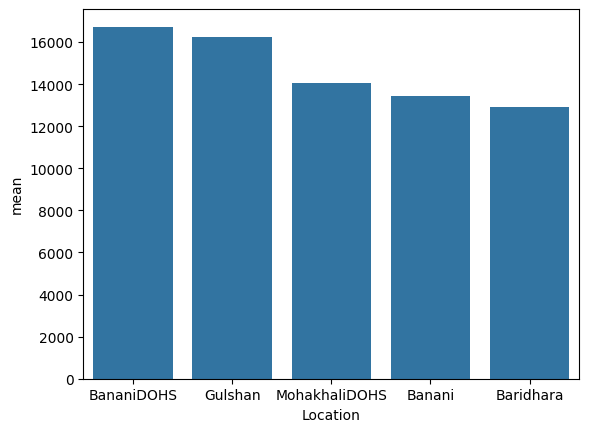

In [42]:
#top 5 visualization with seaborn barplot
top5 = info.groupby('Location').Price_per_sqf.agg(['mean','max','median','min']).sort_values(by = 'mean',ascending=False).head(5)
sns.barplot(data = top5,x='Location',y='mean')

<Axes: xlabel='Location', ylabel='mean'>

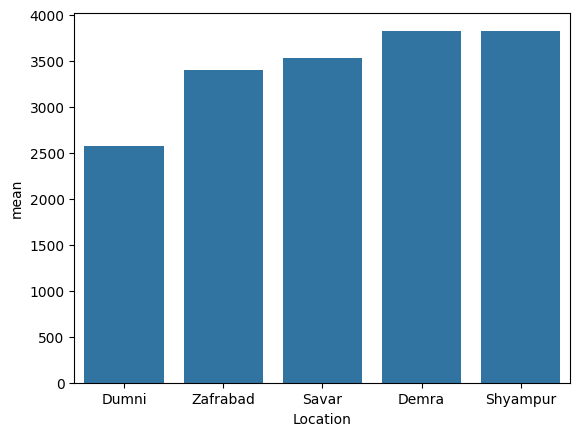

In [43]:
#last 5 visualization with seaborn barplot
last5 = info.groupby('Location').Price_per_sqf.agg(['mean','max','median','min']).sort_values(by = 'mean',ascending=True).head(5)
sns.barplot(data = last5,x='Location',y='mean')

In [44]:
df13 = df12.copy()
df13.head(2)

,Price,Type,Size,Bed,Bath,Location,Price_per_sqf
0,7500000,Apartment,1300.0,3,3,Uttara,5769
1,7280000,Apartment,1456.0,4,4,Mirpur,5000


In [45]:
location_count = df13.groupby('Location').Location.count()
location_count

,Location
Location,
Adabor,308
Aftab Nagar,139
AftabNagar,68
Agargaon,175
Badda,773
...,...
Turag,96
Uttar Khan,72
UttarKhan,2


In [46]:
len(location_count[location_count<=15])

20

In [47]:
location_count[location_count<=15]

,Location
Location,
BananiDOHS,2
Banglamotors,1
Baridhara DOHS,11
BaridharaDOHS,9
Dumni,10
JoarSahara,7
Kakrail,3
Kuril,15
MohakhaliDOHS,3


In [48]:
location_lessthan_15 = location_count[location_count<=15]
location_lessthan_15

,Location
Location,
BananiDOHS,2
Banglamotors,1
Baridhara DOHS,11
BaridharaDOHS,9
Dumni,10
JoarSahara,7
Kakrail,3
Kuril,15
MohakhaliDOHS,3


In [49]:
df13.Location = df13.Location.apply(lambda x: 'Other' if x in location_lessthan_15 else x)

In [50]:
len(df13.Location.unique())

61

In [51]:
df14 = df13.copy()
df14.head(2)

,Price,Type,Size,Bed,Bath,Location,Price_per_sqf
0,7500000,Apartment,1300.0,3,3,Uttara,5769
1,7280000,Apartment,1456.0,4,4,Mirpur,5000


In [52]:
def remove_price_out(df):
  df_output = pd.DataFrame()
  for index,subdf in df.groupby('Location'):
    m = np.mean(subdf.Price_per_sqf)
    st = np.std(subdf.Price_per_sqf)
    reduce_df = subdf[(subdf.Price_per_sqf >= (m-2*st)) & (subdf.Price_per_sqf <= (m+2*st))]
    df_output = pd.concat([df_output,reduce_df],ignore_index=True)
  return df_output
df15 = remove_price_out(df14)
df15.shape

(14191, 7)

In [53]:
df15[df15['Price_per_sqf']<=2000]

,Price,Type,Size,Bed,Bath,Location,Price_per_sqf
10512,2300000,Apartment,1235.0,3,3,Mohammadpur,1862
10513,2200000,Apartment,1235.0,3,3,Mohammadpur,1781
10663,2200000,Apartment,1235.0,3,3,Mohammadpur,1781
10664,2300000,Apartment,1235.0,3,3,Mohammadpur,1862
10665,2300000,Apartment,1235.0,3,3,Mohammadpur,1862
10666,2300000,Apartment,1235.0,3,3,Mohammadpur,1862
10667,2300000,Apartment,1235.0,3,3,Mohammadpur,1862
10668,2300000,Apartment,1235.0,3,3,Mohammadpur,1862
10669,2300000,Apartment,1235.0,3,3,Mohammadpur,1862
10670,2300000,Apartment,1235.0,3,3,Mohammadpur,1862


In [54]:
df15[df15.Location == 'Mohammadpur'].Price_per_sqf.mean()


5005.524324324324

In [55]:
df16 = df15.copy()
df16.head(2)

,Price,Type,Size,Bed,Bath,Location,Price_per_sqf
0,3800000,Apartment,850.0,2,2,Adabor,4470
1,3500000,Apartment,750.0,2,2,Adabor,4666


In [56]:
df16

,Price,Type,Size,Bed,Bath,Location,Price_per_sqf
0,3800000,Apartment,850.0,2,2,Adabor,4470
1,3500000,Apartment,750.0,2,2,Adabor,4666
2,3500000,Apartment,750.0,2,2,Adabor,4666
3,3800000,Apartment,850.0,2,2,Adabor,4470
4,6700000,Apartment,1115.0,3,3,Adabor,6008
...,...,...,...,...,...,...,...
14186,21000000,Apartment,2280.0,3,4,Uttara,9210
14187,5000000,Apartment,1065.0,2,2,Uttara,4694
14188,32500000,Apartment,3000.0,4,4,Uttara,10833
14189,11500000,Apartment,1550.0,3,3,Uttara,7419


In [72]:
df16.drop(['Type','Price_per_sqf'],axis=1,inplace=True)

In [73]:
df16.head(2)

,Price,Size,Bed,Bath,Location
0,3800000,850.0,2,2,Adabor
1,3500000,750.0,2,2,Adabor


In [74]:
df17 = df16.copy()
df17.head(2)

,Price,Size,Bed,Bath,Location
0,3800000,850.0,2,2,Adabor
1,3500000,750.0,2,2,Adabor


In [76]:
df17.to_csv('Clea_Dhaka_Apartment_Price_Prediction.csv',index=False)


In [77]:
df18 = pd.read_csv('/content/Clea_Dhaka_Apartment_Price_Prediction.csv')
df18.head(2)

,Price,Size,Bed,Bath,Location
0,3800000,850.0,2,2,Adabor
1,3500000,750.0,2,2,Adabor


In [78]:
#convert categorical value(Location) to numeric using pandas dummy

In [100]:
location_dummy = pd.get_dummies(df18.Location).astype(np.uint8)
location_dummy.head(2)

,Adabor,Aftab Nagar,AftabNagar,Agargaon,Badda,Banani,Banani DOHS,Banasree,Bangshal,Baridhara,...,Shahjahanpur,Shantinagar,Shiddheswari,Shyamoli,Shyampur,Sutrapur,Tejgaon,Turag,Uttar Khan,Uttara
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [101]:
df19=pd.concat([df18,location_dummy],axis=1)
df19.head(2)

,Price,Size,Bed,Bath,Location,Adabor,Aftab Nagar,AftabNagar,Agargaon,Badda,...,Shahjahanpur,Shantinagar,Shiddheswari,Shyamoli,Shyampur,Sutrapur,Tejgaon,Turag,Uttar Khan,Uttara
0,3800000,850.0,2,2,Adabor,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3500000,750.0,2,2,Adabor,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [102]:

df20 = df19.drop(columns=['Location'], errors='ignore')
df20.head(2)

,Price,Size,Bed,Bath,Adabor,Aftab Nagar,AftabNagar,Agargaon,Badda,Banani,...,Shahjahanpur,Shantinagar,Shiddheswari,Shyamoli,Shyampur,Sutrapur,Tejgaon,Turag,Uttar Khan,Uttara
0,3800000,850.0,2,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3500000,750.0,2,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [103]:
df20.dtypes

,0
Price,int64
Size,float64
Bed,int64
Bath,int64
Adabor,uint8
...,...
Sutrapur,uint8
Tejgaon,uint8
Turag,uint8
Uttar Khan,uint8


In [104]:
df20

,Price,Size,Bed,Bath,Adabor,Aftab Nagar,AftabNagar,Agargaon,Badda,Banani,...,Shahjahanpur,Shantinagar,Shiddheswari,Shyamoli,Shyampur,Sutrapur,Tejgaon,Turag,Uttar Khan,Uttara
0,3800000,850.0,2,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3500000,750.0,2,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3500000,750.0,2,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3800000,850.0,2,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,6700000,1115.0,3,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14186,21000000,2280.0,3,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
14187,5000000,1065.0,2,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
14188,32500000,3000.0,4,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
14189,11500000,1550.0,3,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [105]:
#Now data is ready for Machine Learning, let's go

In [107]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [108]:
x=df20.drop(['Price'],axis=1)
y=df20['Price']

In [109]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=10)

In [110]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(11352, 64)
(2839, 64)
(11352,)
(2839,)


In [111]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [112]:
model.score(x_test,y_test)

0.8757004655557921

In [113]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

In [114]:
cv = ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
cross_val_score(LinearRegression(),x,y,cv=cv)

array([0.87289143, 0.86919596, 0.87853252, 0.87242275, 0.86789754])

In [117]:
def predict_price(size,bed,bath,location):
  loc_index = np.where(x.columns==location)[0][0]
  result=np.zeros(len(x.columns))
  result[0]=size
  result[1]=bed
  result[2]=bath
  if loc_index >= 0:
    result[loc_index]=1
  return model.predict([result])[0]

In [120]:
predict_price(1250,4,4,"Banasree")


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


4418304.607400117